# Exploratory Data Analysis in Python
## Install & load the required packages

In [1]:
# Test to see if running in Colab and if the environment is properly configured
import sys, os
try:
    from gapminder import gapminder
    from pandas_profiling import ProfileReport
except ImportError:
    if 'google.colab' in sys.modules:
        os.system("pip install gapminder")
        from gapminder import gapminder
        !pip uninstall pandas-profiling --yes
        !pip install pandas-profiling
        from pandas_profiling import ProfileReport
    else:
        %matplotlib inline
        print("PLEASE PIP INSTALL THE 'gapminder' or 'pandas-profiling' PACKAGE BEFORE CONTINUING")

## View the Head of the Dataset

In [2]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Plotting using Pandas

<AxesSubplot:>

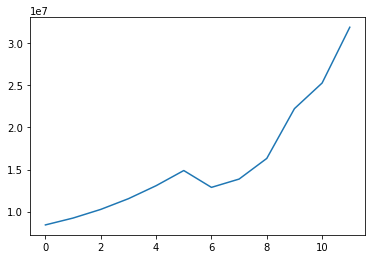

In [3]:
# Plot Afghanistan's Population Overtime
data = gapminder[gapminder["country"]=="Afghanistan"]
data["pop"].plot()

<AxesSubplot:title={'center':'Afghanistan Population – 1952- 2007'}>

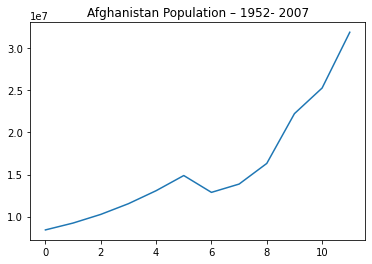

In [4]:
# Add a Title - "Afghanistan Pop - 1952-2005"
Plot_title = "Afghanistan Population – 1952- 2007"

# Define plot
data["pop"].plot(
      title=Plot_title)

<AxesSubplot:title={'center':'Afghanistan Population – 1952- 2007'}>

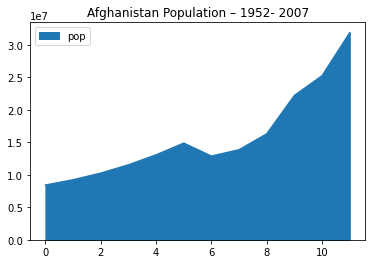

In [5]:
# Change chart type to an area plot

# Define plot
data.plot(y = "pop",
          title=Plot_title, 
          kind="area") # Changing chart type

<AxesSubplot:title={'center':'Afghanistan Population – 1952- 2007'}, xlabel='year', ylabel='pop'>

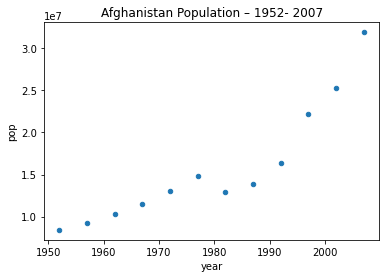

In [6]:
# Change chart type to a scatterplot

# Define plot
data.plot(title=Plot_title,
          kind="scatter", # Changing chart type
          x="year", # Selecting X Axis
          y="pop") # Selecting Y Axis

<AxesSubplot:title={'center':'Histogram of Country Populations - 2007'}, ylabel='Frequency'>

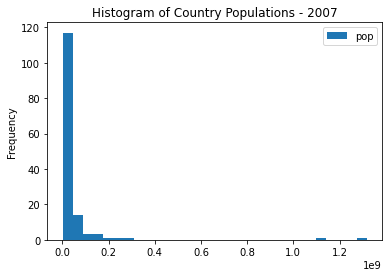

In [7]:
# Histograms

#Specify new dataset
data = gapminder[gapminder["year"]==2007]

#Define plot title
Plot_title="Histogram of Country Populations - 2007"

# Define and print plot
data.plot(title=Plot_title,
          kind='hist', # Changing chart type
          y="pop", # Selecting factor to count by
          bins=30) # Number of bins for hist

<AxesSubplot:title={'center':'Histogram of Country Populations - 2007'}, ylabel='Frequency'>

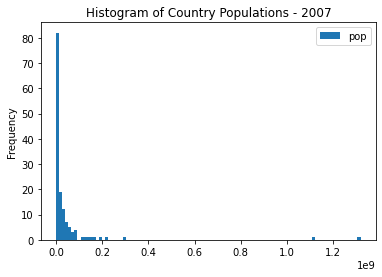

In [8]:
# Histograms
data.plot(title=Plot_title,
          y="pop",
          kind='hist',
          bins=100) # Increasing the number of bins

<AxesSubplot:title={'center':'GDP per Capita vs Life Expectancy - 1952-2007'}, xlabel='gdpPercap', ylabel='lifeExp'>

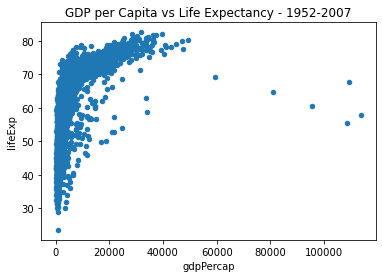

In [9]:
# Scatterplots

# Resetting dataset
data = gapminder

# Specify plot title
Plot_title = "GDP per Capita vs Life Expectancy - 1952-2007"

# Define and print plot
data.plot(title = Plot_title,
          kind ='scatter', # Changing chart type
          x ='gdpPercap', # Selecting X axis
          y ='lifeExp') # Selecting Y axis

<AxesSubplot:title={'center':'GDP per Capita vs Life Expectancy - 1952-2007'}, xlabel='gdpPercap', ylabel='lifeExp'>

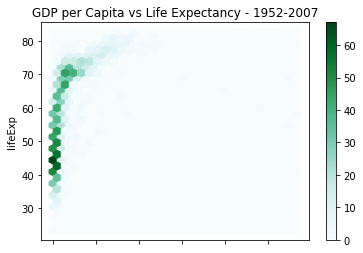

In [10]:
#Hexbin Plot

# Define and print plot
data.plot(title=Plot_title,
          kind='hexbin', # Changing chart type
          x='gdpPercap', # Selecting X axis
          y='lifeExp', # Selecting Y axis
          gridsize=30) # Selecting gridsize

<AxesSubplot:title={'center':'GDP per Capita vs Life Expectancy - 1952-2007'}, xlabel='gdpPercap', ylabel='lifeExp'>

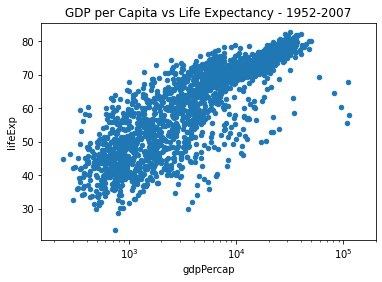

In [11]:
# Enhanced Scatterplot – Log Axis

# Define and print plot
data.plot(title=Plot_title,
          kind='scatter',
          x='gdpPercap',
          y='lifeExp',
          logx=True, # Display log of x-axis
          xlim=(150,200000)) # Set x axis limits

<AxesSubplot:title={'center':'GDP per Capita vs Life Expectancy - 1952-2007'}, xlabel='gdpPercap', ylabel='lifeExp'>

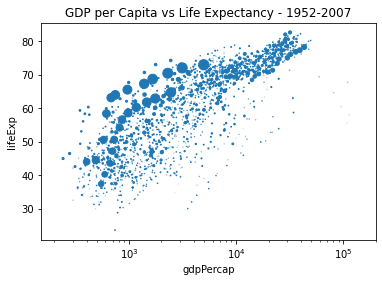

In [12]:
# Enhanced Scatterplot – Population Size

# Define and print plot
data.plot(title=Plot_title,
          kind='scatter',
          x='gdpPercap',
          y='lifeExp',
          logx=True,
          xlim=(150,200000),
          s = data['pop']*0.00000008) # Set size for dots

<AxesSubplot:title={'center':'GDP per Capita vs Life Expectancy - 1952-2007'}, xlabel='gdpPercap', ylabel='lifeExp'>

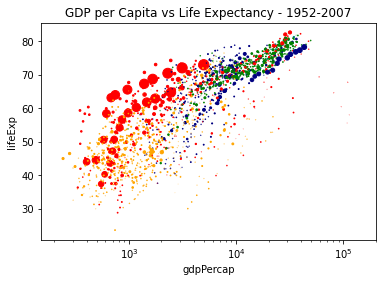

In [13]:
# Enhanced Scatterplot - Color

# Define colors by continent
continent_color = {'Asia':"red",
                   'Africa':'orange',
                   'Americas':'navy',
                   'Europe':'green',
                   'Oceania':'teal'}

# Assign colors by continent
data['color'] = [continent_color[x] for x in data['continent']]

# Define and print plot
data.plot(title=Plot_title,
          kind='scatter',
          x='gdpPercap',
          y='lifeExp',
          logx=True,
          xlim=(150,200000),
          s = data['pop']*0.00000008,
          c=data['color']) # Assign colors to points

## Pandas - Scatterplot Matrix

In [14]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='lifeExp', ylabel='year'>,
        <AxesSubplot:xlabel='pop', ylabel='year'>,
        <AxesSubplot:xlabel='gdpPercap', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='lifeExp'>,
        <AxesSubplot:xlabel='lifeExp', ylabel='lifeExp'>,
        <AxesSubplot:xlabel='pop', ylabel='lifeExp'>,
        <AxesSubplot:xlabel='gdpPercap', ylabel='lifeExp'>],
       [<AxesSubplot:xlabel='year', ylabel='pop'>,
        <AxesSubplot:xlabel='lifeExp', ylabel='pop'>,
        <AxesSubplot:xlabel='pop', ylabel='pop'>,
        <AxesSubplot:xlabel='gdpPercap', ylabel='pop'>],
       [<AxesSubplot:xlabel='year', ylabel='gdpPercap'>,
        <AxesSubplot:xlabel='lifeExp', ylabel='gdpPercap'>,
        <AxesSubplot:xlabel='pop', ylabel='gdpPercap'>,
        <AxesSubplot:xlabel='gdpPercap', ylabel='gdpPercap'>]],
      dtype=object)

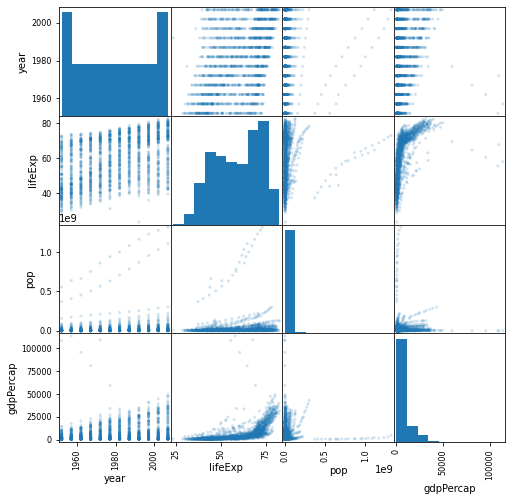

In [15]:
# Redefine our dataset
data = gapminder

# Print our plot
scatter_matrix(data, alpha=0.2, figsize=[8,8])

## Seaborn

In [16]:
import seaborn as sns

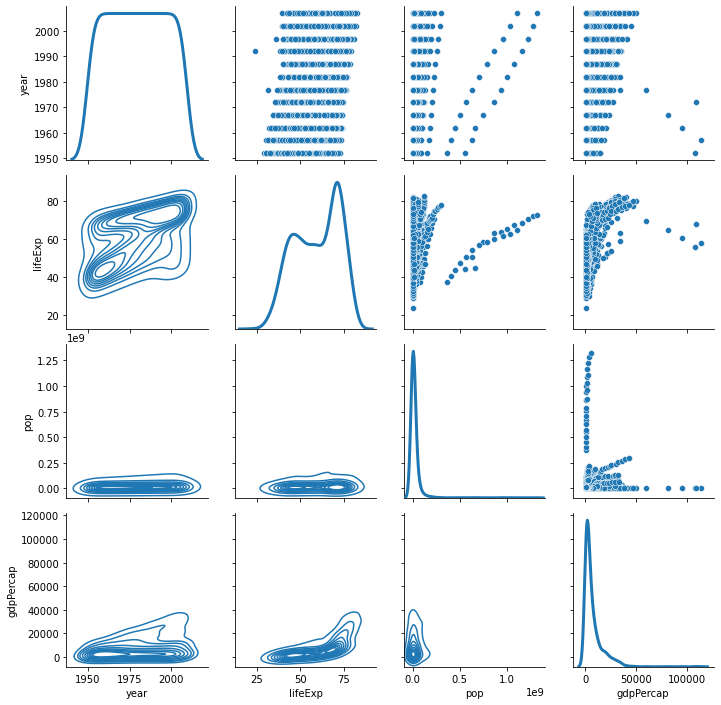

In [17]:
# Create a seaborn scatterplot matrix
g = sns.PairGrid(data, diag_sharey=False)

# Make the lower half KDE plots
g.map_lower(sns.kdeplot)

# Make the upper half scatterplots
g.map_upper(sns.scatterplot)

# Make the diagonal histograms
g.map_diag(sns.kdeplot, lw=3)

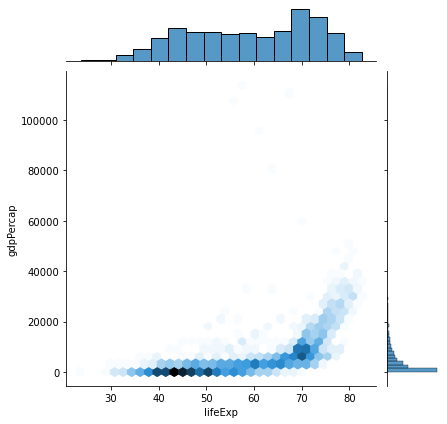

In [18]:
# Seaborn Joint Plot

# X axis 
x = data['lifeExp']

# Y axis
y = data['gdpPercap']

# Create plot
sns.jointplot(x=x, y=y, kind='hex')


## Pandas Profiling

In [19]:
profile = ProfileReport(gapminder, title="Pandas Profiling Report")

In [20]:
gapminder.profile_report()